In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def F(n, F0, OMEGA):
    gamma = 0
    return F0 * np.cos(OMEGA*n + gamma)

def f(n, y, omega, beta, F0, OMEGA):
    v_t = y[1, n]
    return v_t

def g(n, y, omega, beta, F0, OMEGA):
    x_t = y[0, n]
    v_t = y[1, n]
    return -np.power(omega, 2)*x_t - beta*v_t + F(n, F0, OMEGA)


In [33]:

def RK4(y, dt, funcs, omega, beta, F0, OMEGA):
    for n in range(0, y.shape[1] - 1):
        for fi in range(y.shape[0]):
            y_n = funcs[fi](n, y, omega, beta, F0, OMEGA)

            k1 = y_n
            k2 = y_n + 0.5*dt*k1
            k3 = y_n + 0.5*dt*k2
            k4 = y_n + dt*k3

            y[k, n + 1] =  y[k, n] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)


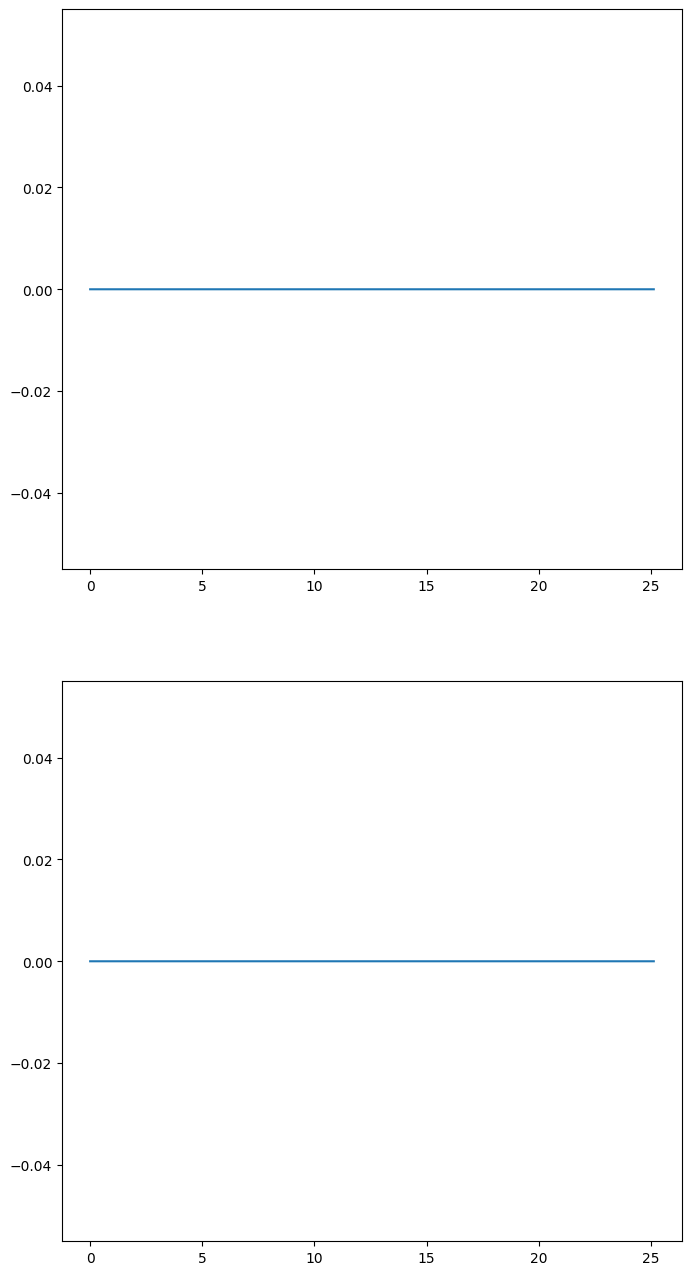

In [39]:
# a)
dt = 10e-4

k = 1
m = 1
beta = 0
F0 = 0
OMEGA = 0

omega = np.sqrt(k/m)
T0 = 2*np.pi/omega

t = np.arange(0, 4*T0 + dt, dt)

x = np.zeros(len(t))
v = np.zeros(len(t))
y = np.array([x, v])
funcs = [f, g]

RK4(y, dt, funcs, omega, beta, F0, OMEGA)

x[0] = 1
v[0] = 0

axs = plt.subplots(2, 1, figsize=(8, 16))[1]

ax = axs[0]
ax.plot(t, y[0], label='x')

ax = axs[1]
ax.plot(t, y[1], label='v')
